<AxesSubplot:xlabel='dropped Xvars', ylabel='error'>

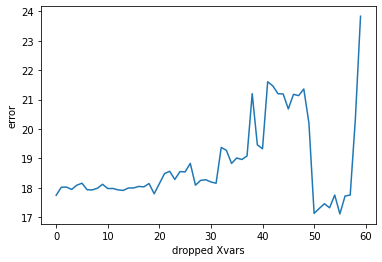

In [2]:
from scalecast.Forecaster import Forecaster
from scalecast.util import pdr_load, plot_reduction_errors

f = pdr_load('HOUSTNSA',start='1959-01-01',src='fred')
f.set_test_length(.2) # 20% holdout
f.generate_future_dates(24)

f.add_ar_terms(36)
f.add_seasonal_regressors(
  'month',
  'quarter',
  raw=False,
  sincos=True,
  dummy=True,
)
f.add_time_trend()
f.add_logged_terms('t')
f.add_poly_terms('t','lnt',pwr=2)
f.integrate()

f.reduce_Xvars(
  method='shap',
  estimator='xgboost',
  cross_validate=True,
  cvkwargs={
    'k':5, # default - 5-fold cv
    'rolling':False, # default
  }, 
  grid_search=True, # default to optimize estimator
  keep_at_least=1, # default
  keep_this_many='auto', # default
)
# view results
plot_reduction_errors(f)

In [3]:
f.reduced_Xvars

['AR1', 'AR6', 'AR12', 'monthsin', 'monthcos']